In [50]:
# modules importation
from trends_functions import *
from warnings import filterwarnings
filterwarnings('ignore')

In [51]:
# computation parameters
params = get_params()

In [52]:
# run observations
# 'ang4487aer' 'od550aer' 'od550gt1aer' 'od550lt1aer' 'concpm10' 'concpm25' 'concso4' 'scatc550dryaer' 'absc550aer'
var = 'absc550aer'
params['kind'] = 'obs'
params['min_dobs'] = 300
fill_params(params, var)
if var in ['scatc550dryaer', 'absc550aer']:
    params['period'] = '2000-2018'
params['var'] = var
obs_source = params['source']
reader = pya.io.ReadUngridded(obs_source)
obs_data = reader.read(vars_to_retrieve=var)

OBS
excluding module
excluding modulestation:  Vavihillmospheric Research Observatoryt
region:  ASIA station:  Gosanon-do
Less than 7 points in selected period
excluding module
excluding moduleA station:  Trinidad Headt Plains E13
excluding moduleA station:  Cape San Juan
exclude  Granada
region:  NAFRICA station:  Finokaliaillo
Less than 7 points in selected period
excluding module
No station found in , AUSTRALIA Point
excluding module
exclude  Alert
exclude  Granada


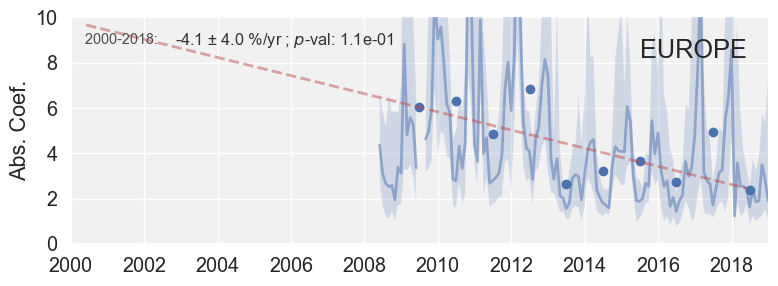

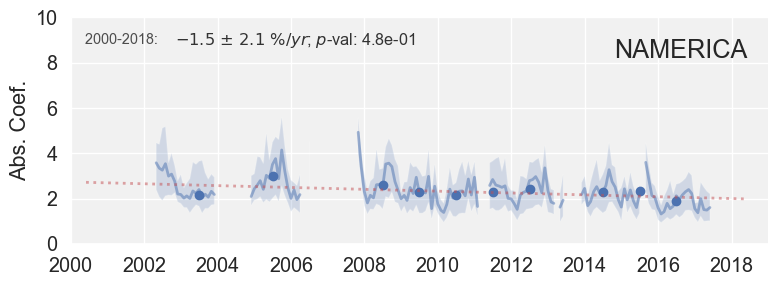

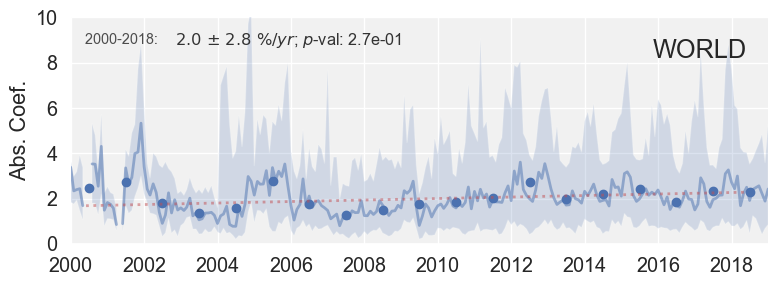

In [53]:
print('OBS')
OBS_TS, OBS_MAP, OBS_DF = process_trend(
    obs_data, params,
    plot=True, show_plot=False, save_plot=True, write_json=True
)

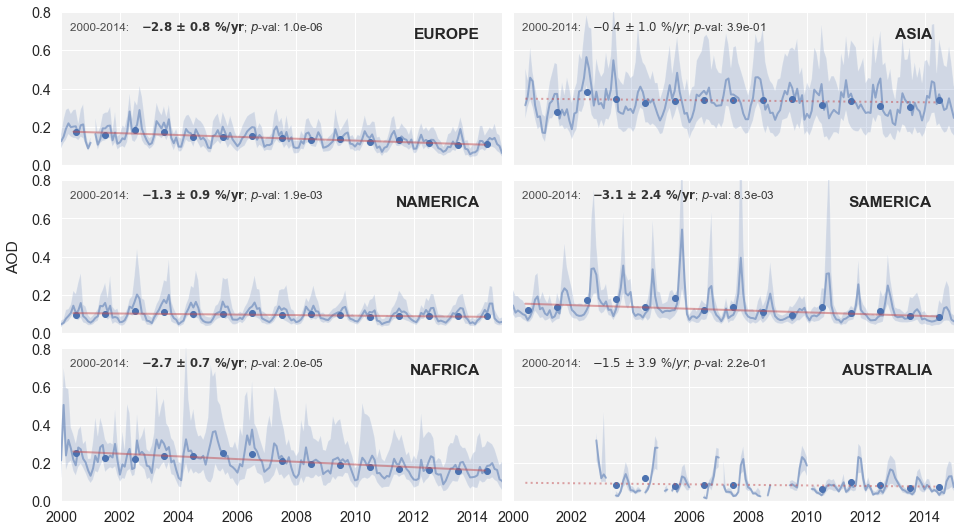

In [12]:
regions = ['EUROPE', 'ASIA', 'NAMERICA', 'SAMERICA', 'NAFRICA', 'AUSTRALIA']
nl, nc = 3, 2
fig, axs = plt.subplots(nl, nc, sharex='col', sharey='row',
                           gridspec_kw={
                               'wspace': 0.025,
                               'hspace': 0.1
                           })
    
# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
il, ic = 0, 0

for i, region in enumerate(regions):
    ax = axs[il, ic]
    
    if region in OBS_MAP and 'monthly' in OBS_MAP[region]['trends']:
        mmed = {
            'x': js2date(OBS_MAP[region]['trends']['monthly']['jsdate']),
            'y': OBS_MAP[region]['trends']['monthly']['data']
        }
        mbottom = {
            'x': js2date(OBS_MAP[region]['trends']['monthly']['jsdate']),
            'y': OBS_MAP[region]['trends']['monthly']['bottom']
        }
        mtop = {
            'x': js2date(OBS_MAP[region]['trends']['monthly']['jsdate']),
            'y': OBS_MAP[region]['trends']['monthly']['top']
        }
        ymed = {
            'x': js2date(OBS_MAP[region]['trends']['yearly']['jsdate']),
            'y': OBS_MAP[region]['trends']['yearly']['data']
        }
        trend = OBS_MAP[region]['trends']['trends']

        subplotTS(ax, il,ic,mmed, mbottom, mtop, ymed, trend, region, params)
    else:
        # write region at top-right
        ax.text(.95, .9, region, ha='right', va='top', transform=ax.transAxes, fontsize=12 * 1.3, fontweight='bold')

        #change face color of axis
        ax.set_facecolor('#F1F1F1')

    #calculates next axis
    if ic<nc-1:
        ic+=1
    else:
        il+=1
        ic=0
    
    #change size of the figure
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor=None, top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    #set yølabl
    plt.ylabel(params['ylabel'],labelpad=40)
    
    fx = 1.5
    fig.set_size_inches(16,9)
    fig = plt.gcf()
    plt.savefig('figs/ts/panel-'+var+'.png', dpi=300, bbox_inches='tight')

In [10]:
#print the results
print(' * * OBS * *')
print_trends(OBS_MAP)

 * * OBS * *
region 	 period 	 %/yr 		 pval
 - - - 	  - - - 	  - - 		  - -
EUROP 	 2000-2014 	  -5.5 ± 3.7  	 0.01
ASIA 	 Key Error
AUSTRALIA 	 Key Error
SAFRICA 	 Key Error
NAMER 	 2000-2014 	 ( -1.4 ± 2.2 ) 	 0.26
SAMERICA 	 Key Error
WORLD 	 2000-2014 	  5.8 ± 5.7  	 0.04



(730120.0, 735599.0)

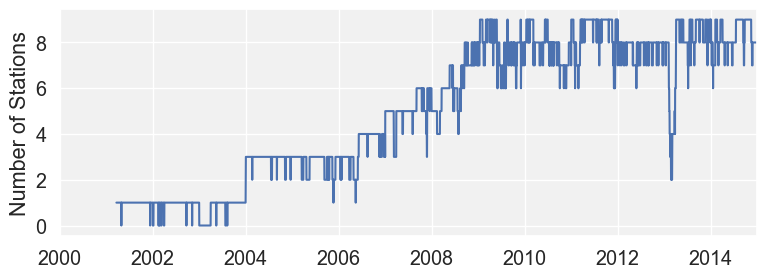

In [11]:
#show variations in number of stations with time
df = OBS_DF['EUROPE']
n = df.count(axis=1, numeric_only=False)

#open the figure
fig, ax = plt.subplots(figsize=(9, 3), dpi=100, facecolor='w', edgecolor='k')
plt.plot(n.index, n.values)
ax.set_facecolor('#F1F1F1')
ax.set_ylabel('Number of Stations')
ax.set_xlim('2000-01-01','2015-01-01')
#plt.savefig('figs/ts/time_experiment.png', dpi=300, bbox_inches='tight')

#### Plot which details the slope error calculation

In [ ]:
import random
x = np.arange(20,100)
y = [20+i*random.random()+0.5*i for i in x]
fig, ax = plt.subplots(figsize=(9, 3), dpi=100, facecolor='w', edgecolor='k')
plt.plot(x,y,'.-',lw=1)
ax.set_xlim(0,100)
ax.set_ylim(0,200)

# theil sen slope
a, b, low_slope, up_slope = stats.mstats.theilslopes(y, x, alpha=0.9)

# reproject on the whole period asked
xb = np.arange(0,100)
reg = a*xb+b
rlslp = a * 100 / reg[0]
low_reg = low_slope*xb+b
up_reg = up_slope*xb+b


plt.plot(xb, reg, 'r-')
plt.plot(xb, low_reg, 'r:')
plt.plot(xb, up_reg, 'r:')


slope_err = np.mean([abs(a - low_slope), abs(a - up_slope)])
print(abs(a - low_slope), abs(a - up_slope))
print('slope_err: {}'.format(slope_err))

resid = np.abs(np.array(y) - [a * i + b for i in x])
avg_resid = np.mean(resid)
print('avg_resid: {}'.format(avg_resid))

plt.plot(x,resid,':', color='gray')
plt.plot(x,avg_resid*np.ones(len(x)),'-',color='gray')

#compute errors
delta_sl = slope_err / reg[0]
print('delta_sl: {}'.format(delta_sl))
delta_ref = a * avg_resid/ reg[0]**2

print('delta_ref: {}'.format(delta_ref))

trend_err = np.sqrt(delta_sl**2 + delta_ref**2) * 100
print('trend_err: {}'.format(trend_err))


Text(0.5, 1.0, 'EUROPE')

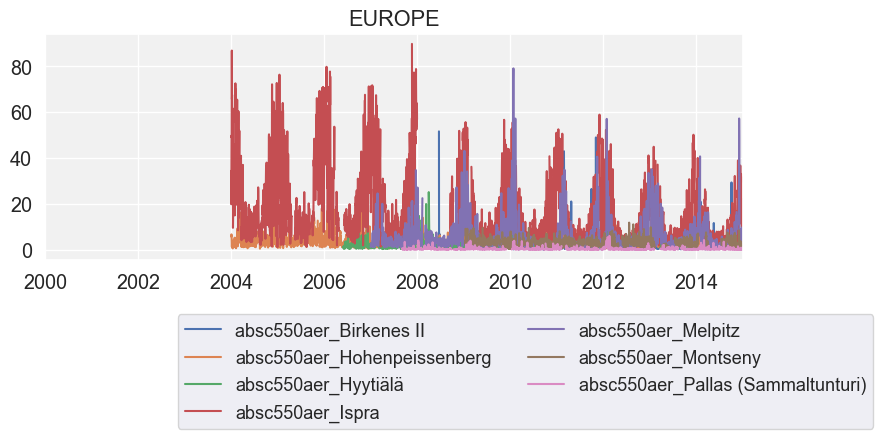

In [13]:
region = 'EUROPE'
df = OBS_DF[region]

#open the figure
fig, ax = plt.subplots(figsize=(9, 3), dpi=100, facecolor='w', edgecolor='k')
for stat in df:
    plt.plot(df[stat].index, df[stat].values, label=stat)
ax.set_facecolor('#F1F1F1')
ax.set_xlim('2000-01-01','2015-01-01')
ax.legend(ncol=2, fontsize='small',bbox_to_anchor=(1.2, -0.2))
plt.title(region)

In [10]:
len(OBS_DF['EUROPE'].columns)

61

In [4]:
### Compute WORLD time series by weighting with inverse of number of observations in the region

In [31]:
obs_data = reader.read(vars_to_retrieve=var)

In [32]:
regions = get_regions()
region = 'WORLD'
data = obs_data

In [34]:
# by default, colocate model in space and time
MAP, DF,  ALL_TS = {}, {}, {}


# computation region by region
#concso4 ha no mountains filtering
if params['var']!='concso4':
    f = pya.Filter(region+'-noMOUNTAINS')
else:
    f = pya.Filter(region)
if params['kind'] == 'obs':
    sub = f(data)

    #remove outliers and nan flags
    try:
        sub = sub.set_flags_nan()
    except AttributeError:
        print('no flags')

    sub = sub.apply_filters(remove_outliers=True)

    var = data.vars_to_retrieve[0]
    obs_var = var

elif params['kind'] == 'mod':
    if obs == None:
        print('kind is model. Needs to pass an obs dataset')
    else:
        try:
            sub = f(obs)
            var = data.var_name
        except:
            print('No station found in ',region)
            MAP[region] = {
                'name': region,
                'min_lon': pya.Region(region).lon_range[0],
                'max_lon': pya.Region(region).lon_range[1],
                'min_lat': pya.Region(region).lat_range[0],
                'max_lat': pya.Region(region).lat_range[1],
                'trends': {},
                'nmax': 0,
                'stations': [],
            }

# for each subset, creates a dataframe containing all stations timeseries
# first, get station data
data_all = sub.to_station_data_all()['stats']




#exclude stations
data_ok = []
if 'exclude_stations' in params:
    print('excluding module')
    for dat in data_all:
        if dat['station_name'] not in params['exclude_stations']:
            data_ok.append(dat)
        else:
            print('exclude ',dat['station_name'])
    data_all = data_ok

obs_all = copy.copy(data_all)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# if model
if params['kind'] == 'mod':

    obs_var = obs.vars_to_retrieve[0]            

    #reduce data_all to list of filtered stations
    if region in OBS_DF:
        okstats = [col.split('_')[1] for col in list(OBS_DF[region].keys())]
        data_all = [data for data in data_all if data['station_name'] in okstats]
    else:
        data_all = []

    if colocate_space:
        # first, get list of stations name, lat and lon
        stations = {'name': [], 'lat': [], 'lon': []}

        for stat in data_all:
            stations['name'].append(stat['station_name'])
            stations['lat'].append(stat['station_coords']['latitude'])
            stations['lon'].append(stat['station_coords']['longitude'])

        if len(data_all)>0:
            data_all = data.to_time_series(
                longitude=stations['lon'], latitude=stations['lat'],
                add_meta=dict(station_name=stations['name'])
            )
            npoints = len(data_all)
    else:
        data_all = f(data)
        med_area = data_all.get_area_weighted_timeseries()
        npoints = np.shape(data_all.cube.data)[1]*np.shape(data_all.cube.data)[2]
        print(region, npoints)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# initialize pandas DataFrame
df = pd.DataFrame()

stations = []
if params['kind'] == 'mod' and colocate_space == False:
    med = med_area[var]
    top = med
    bottom = med
    ts = med.to_frame()
    ts.set_axis([obs_var + '_' + region], axis=1, inplace=True)
    df = pd.concat([df, ts], axis=1)
else:
    for i, station in enumerate(data_all):
        stat_name = station.station_name
        print('region: ', region, 'station: ', stat_name, end="\r")
        ts_type = station.ts_type
        # set individual time series as dataframe

        # extract pandas series and convert it to datframe
        ts = data_all[i][var].to_frame()
        # remove duplicated index keeping the first occuence
        ts = ts.groupby(ts.index).first()
        #name the columns
        ts.set_axis([obs_var + '_' + stat_name], axis=1, inplace=True)
        #if region is WORLD, get number of stations in previous computed regions to use it as weight
        #if region=='WORLD':
        #    ts['weight'] = 1/n['region']
        
        #print(ts_type)
        if ts_type == 'hourly':
            #make daily average
            ts = ts.resample('D', how='mean')
            # concatenates to main dataframe
            #df = pd.concat([df, ts], axis=1)
            if ts.count()[0] >= params['min_dobs']:
                df = pd.concat([df, ts], axis=1)
        elif ts_type == 'daily':
            if ts.count()[0] >= params['min_dobs']:
                # concatenates to main dataframe
                df = pd.concat([df, ts], axis=1)
        else:
            # concatenates to main dataframe
            df = pd.concat([df, ts], axis=1)


In [23]:
omap = OBS_MAP['WORLD']['stations']

In [37]:
odf = list(OBS_DF['WORLD'].keys())

In [54]:
for region in ['EUROPE', 'NAMERICA']:
    odf = list(OBS_DF[region].keys())
    stat = [stat[len(var)+1:] for stat in odf]
    print(region)
    print(stat)

EUROPE
['Aspvreten', 'Birkenes II', 'Hyytiälä', 'Ispra', 'K-puszta', 'Kosetice (NOAK)', 'Montseny', "Observatoire Perenne de l'Environnement", 'Pallas (Sammaltunturi)', 'SIRTA Atmospheric Research Observatory', 'Vavihill']
NAMERICA
['Bondville', 'Sable Island', 'Southern Great Plains E13', 'Trinidad Head']


In [43]:
len(odf_nam)

21